<a href="https://colab.research.google.com/github/beaconfident/Mobile-Price-Prediction/blob/main/MOBILE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=pd.read_csv("/content/mobile phone price prediction.csv")
data.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [ ]:
data.tail()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
1365,1365,TCL 40R,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,Memory Card (Hybrid),12,"18,999",TCL,64 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 700 5G
1366,1366,TCL 50 XL NxtPaper 5G,4.10,80,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.8 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,Memory Card (Hybrid),14,"24,990",TCL,128 GB inbuilt,33W Fast Charging,1200 x 2400 px,Octa Core,Dimensity 7050
1367,1367,TCL 50 XE NxtPaper 5G,4.00,80,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 16 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"23,990",TCL,256 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6080
1368,1368,TCL 40 NxtPaper 5G,4.50,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 1 TB",13,"22,499",TCL,256 GB inbuilt,15W Fast Charging,720 x 1612 px,Octa Core,Dimensity 6020
1369,1369,TCL Trifold,4.65,93,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,4600 mAh Battery,10 inches,"Foldable Display, Dual Display",50 MP + 48 MP + 8 MP Triple Rear &amp; 32 MP F...,13,"1,19,990",TCL,256 GB inbuilt,67W Fast Charging,1916 x 2160 px,Octa Core,Snapdragon 8 Gen2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Name,0
Rating,0
Spec_score,0
No_of_sim,0
Ram,0
Battery,0
Display,0
Camera,0
External_Memory,0


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1365,False
1366,False
1367,False
1368,False


In [ ]:
data.shape

(1370, 18)

In [ ]:
data.size

24660

In [ ]:
data.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv("/content/mobile phone price prediction.csv")

# Features and target variable
X = data[['Rating']]
y = data['Spec_score']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Absolute Error: 6.543065791606685
Mean Squared Error: 61.113386921098176
R-squared Score: -0.02871696300850224


In [ ]:
# Calculate percentage accuracy
accuracy = 100 - (mae / y_test.mean()) * 100
print("Accuracy:", accuracy, "%")



Accuracy: 91.94717680950352 %


Mean Absolute Error: 6.543065791606685
Mean Squared Error: 61.113386921098176
R-squared Score: -0.02871696300850224


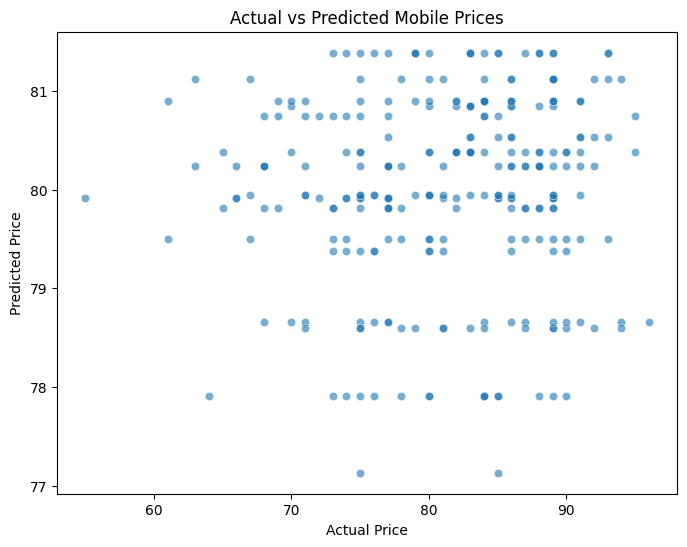

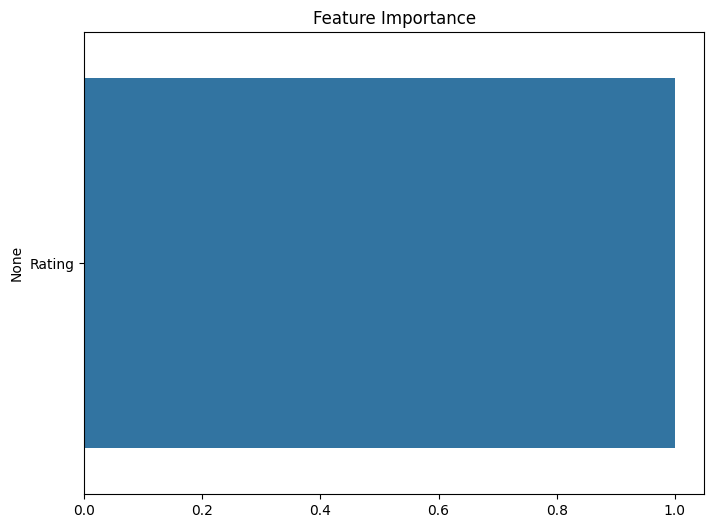

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv("/content/mobile phone price prediction.csv")

# Features and target variable
X = data[['Rating']]
y = data['Spec_score']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Mobile Prices")
plt.show()

# Feature importance plot
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.show()
